In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
import matplotlib.mlab as mlab

In [2]:
df=pd.read_csv("/content/train-chennai-sale.csv")

In [3]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
df.shape

(7109, 22)

In [5]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [6]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [8]:
#Droping unwanted columns 
df.drop(['PRT_ID'],axis=1,inplace=True)# all the values are unique
df.drop(["COMMIS"],axis=1,inplace=True)
df.drop(["REG_FEE"],axis=1,inplace=True)

In [9]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

In [10]:
#df_numerical = df.select_dtypes(include='int64')

In [11]:
#df_categorical = df.select_dtypes(include='object')

In [12]:
# we are working with categorical column 
#1. Area 
df["AREA"].isnull().sum()

0

In [13]:
df.AREA.values

array(['Karapakkam', 'Anna Nagar', 'Adyar', ..., 'Velachery',
       'Karapakkam', 'Velachery'], dtype=object)

In [14]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [15]:
df["AREA"].replace({"Karapakam":"Karapakkam","Ana Nagar":"Anna Nagar","Ann Nagar":"Anna Nagar","Adyr":"Adyar","Velachery":"Velchery","Chrompet":"Chormpet","Chrompt":"Chormpet","Chrmpet":"Chormpet","KKNagar":"KK Nagar","TNagar":"T Nagar"},inplace=True)

In [16]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velchery', 'Chormpet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [17]:
df.AREA.value_counts()

Chormpet      1702
Karapakkam    1366
KK Nagar       997
Velchery       981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

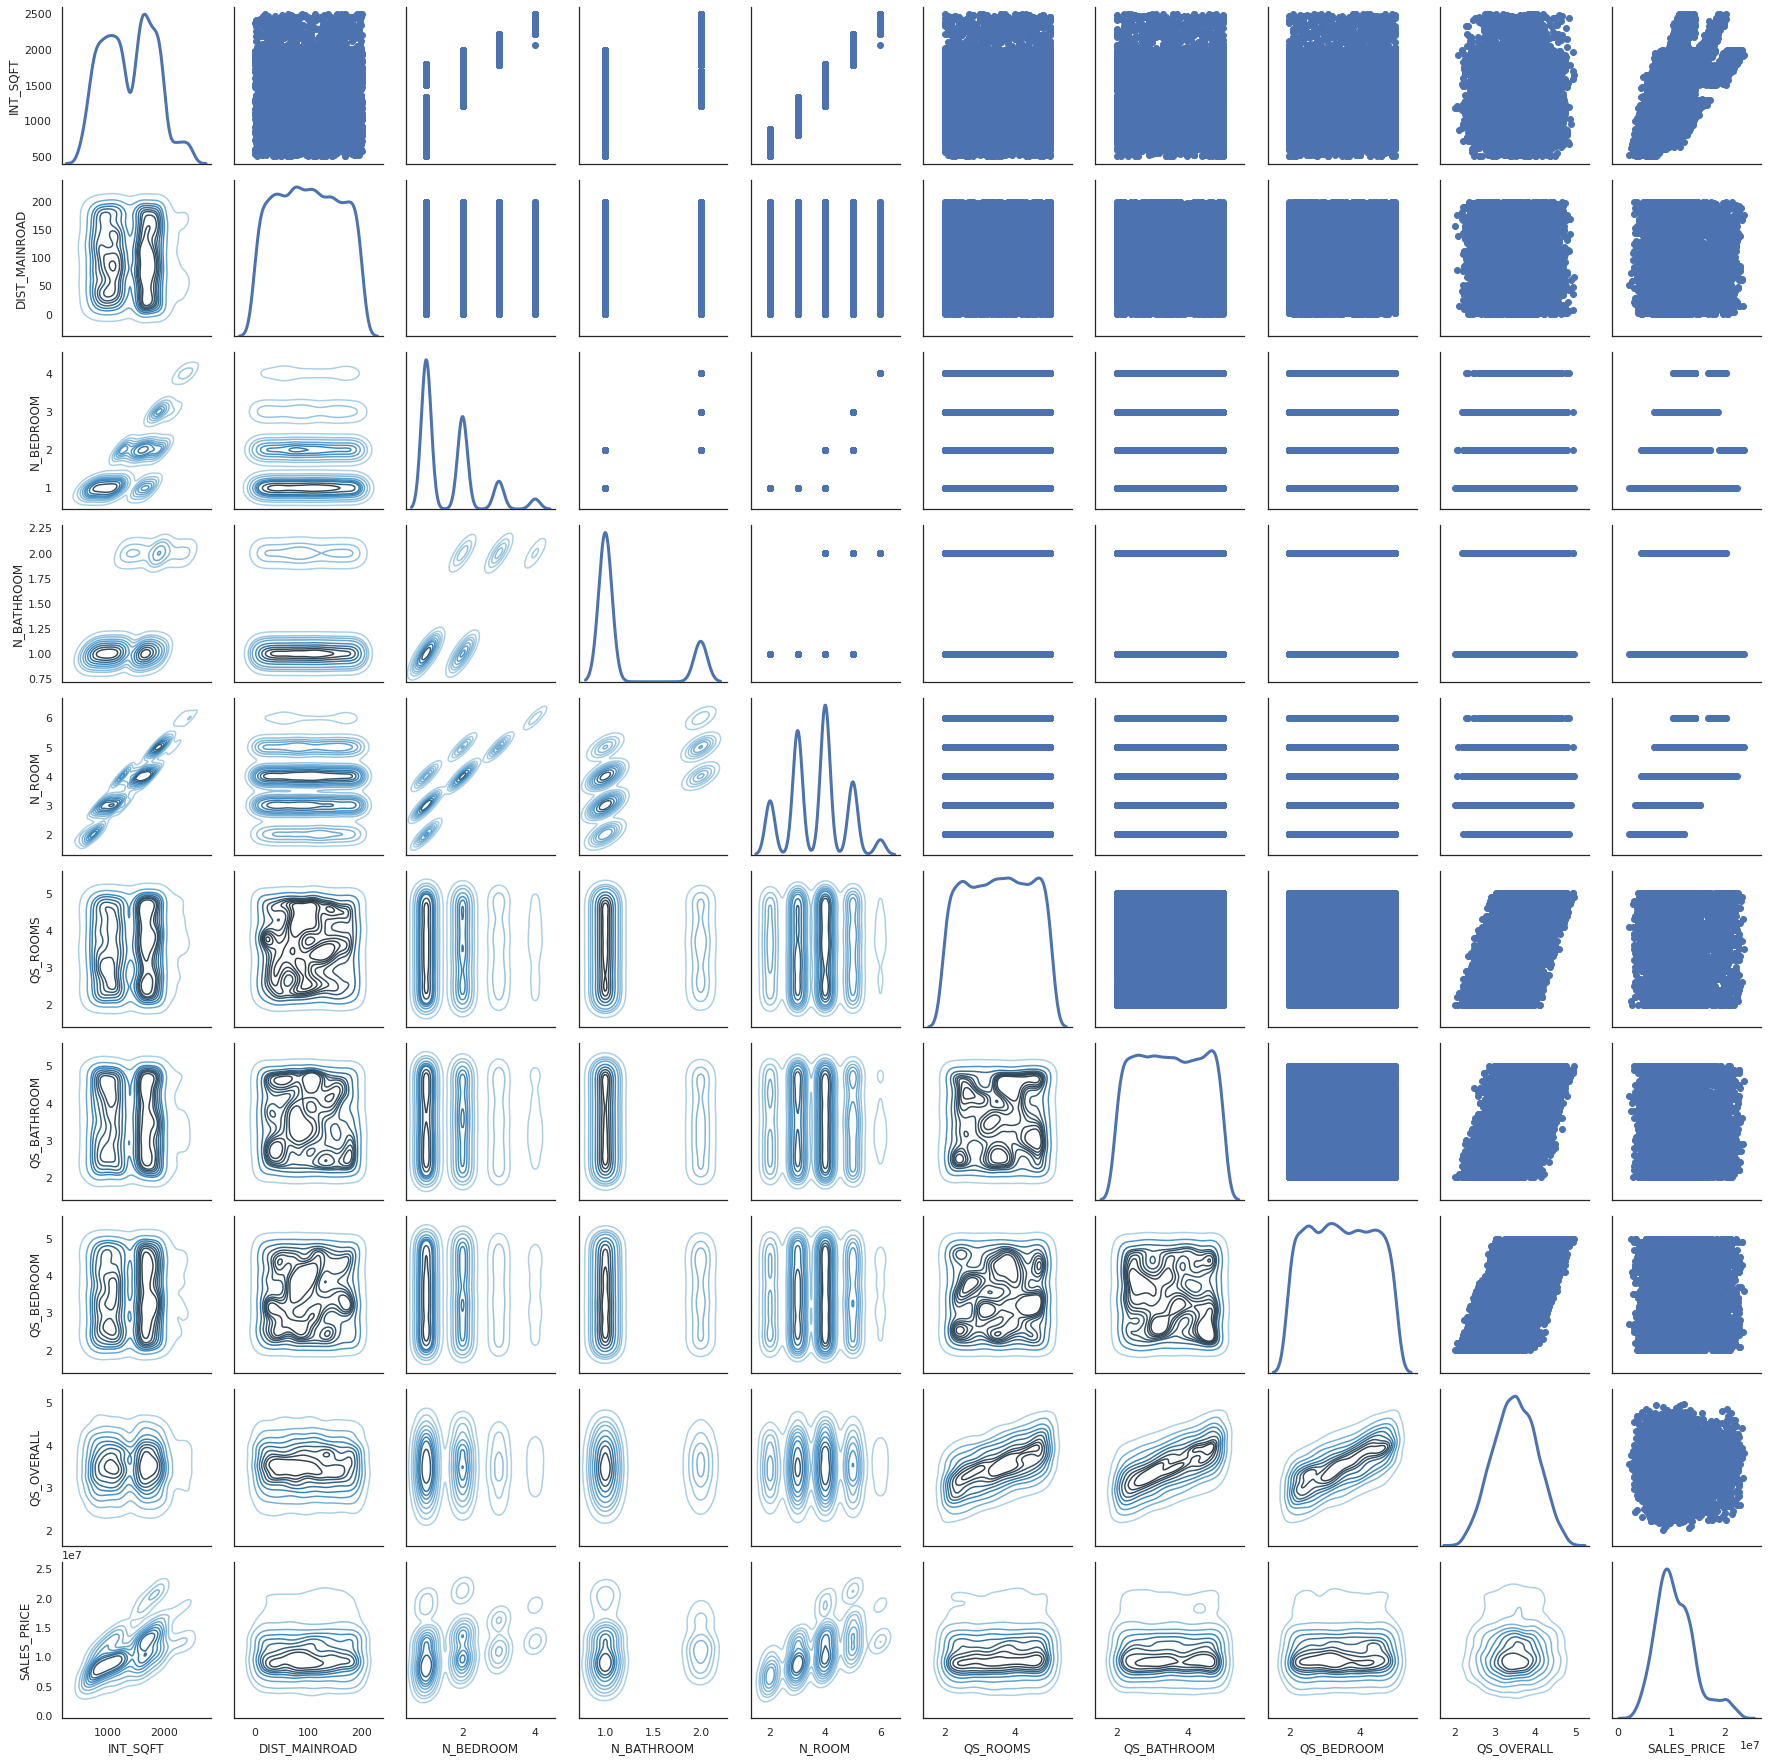

In [18]:
sns.set(style="white")
df = df.loc[:,['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

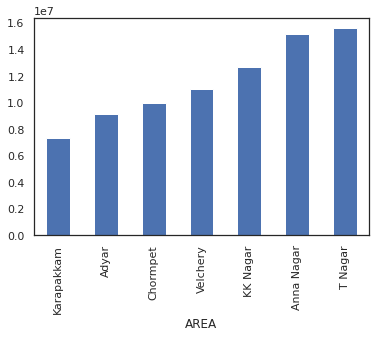

In [19]:
df.groupby("AREA")["SALES_PRICE"].mean().sort_values(ascending = True).plot.bar()

In [20]:
Area = {"Karapakkam":0,"Adyar":1,"Chormpet":2,"Velchery":3,"KK Nagar":4,"Anna Nagar":5,"T Nagar":6}

In [21]:
df.AREA = df["AREA"].replace(Area)

In [22]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,0,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,5,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,1,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,3,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,0,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


In [23]:
#2 INT_SQFT
df.INT_SQFT.values

array([1004, 1986,  909, ..., 1614,  787, 1896])

In [24]:
df.INT_SQFT.isnull().sum()

0

In [25]:
df.INT_SQFT.describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

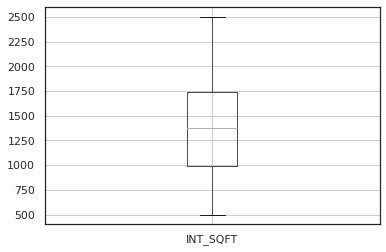

In [26]:
df.boxplot('INT_SQFT')

In [27]:
from seaborn.utils import iqr
q3= df.INT_SQFT.quantile(0.75)
q1=df.INT_SQFT.quantile(0.25)
iqr= q3-q1
iqr 

751.0

In [28]:
q3 + 1.5*iqr

2870.5

In [29]:
q1 - 1.5*iqr

-133.5

In [30]:
df.INT_SQFT.dtype

dtype('int64')

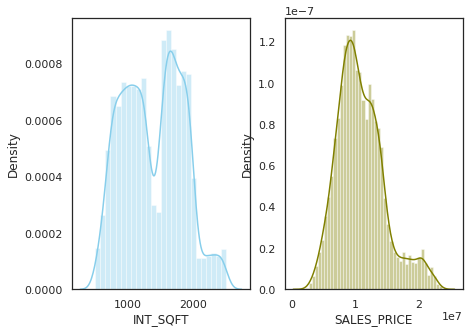

In [31]:
f, axes = plt.subplots(1, 2, figsize=(7, 5))
sns.distplot( df["INT_SQFT"] , color="skyblue", ax=axes[0])
sns.distplot( df["SALES_PRICE"] , color="olive", ax=axes[1])

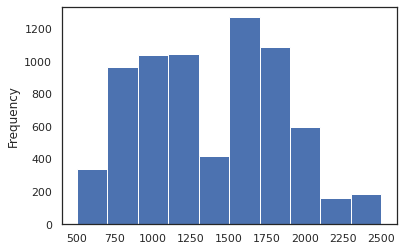

In [32]:
df.INT_SQFT.plot(kind = 'hist')

In [ ]:
# Date_Sale
df.DATE_SALE.values

array(['04-05-2011', '19-12-2006', '04-02-2012', ..., '25-08-2006',
       '03-08-2009', '13-07-2005'], dtype=object)

In [ ]:
df.DATE_SALE.dtype

dtype('O')

In [ ]:
df.DATE_SALE = pd.to_datetime(df.DATE_SALE)

In [ ]:
df.DATE_SALE.dtype

dtype('<M8[ns]')

In [ ]:
df["Sale_year"] = pd.DatetimeIndex(df["DATE_SALE"]).year

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   int64         
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7108 non-null   float64       
 5   N_BATHROOM     7104 non-null   float64       
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   object        
 9   DATE_BUILD     7109 non-null   object        
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  QS_ROOMS       7109 non-null   float64       
 15  QS_BATHROOM    7109 n

In [ ]:
df.DATE_SALE.isnull().sum()

0

In [ ]:
#4 DIST_MAINROAD
df.DIST_MAINROAD.isnull().sum()

0

In [ ]:
df.DIST_MAINROAD.dtype

dtype('int64')

In [ ]:
df.DIST_MAINROAD.describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

In [ ]:
q3 = df.DIST_MAINROAD.quantile(0.75)
q1 = df.DIST_MAINROAD.quantile(0.25)
iqr = q3-q1
iqr

98.0

In [ ]:
q3 +1.5*iqr

294.0

In [ ]:
q1-1.5*iqr

-97.0

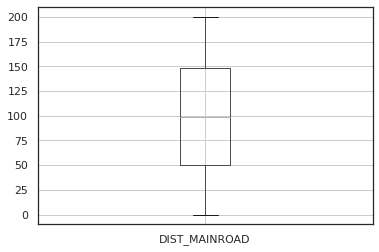

In [34]:
df.boxplot('DIST_MAINROAD')

In [36]:
# creating new feature for Eda
df['DATE_SALE']= pd.to_datetime(df['DATE_SALE'])
df['YEAR_SALE'] = df['DATE_SALE'].dt.year

In [37]:
df.drop(['DATE_SALE'],axis=1)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YEAR_SALE
0,0,1004,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,2011
1,5,1986,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,2006
2,1,909,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,2012
3,3,1855,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,2010
4,0,1226,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000,2011
7105,3,1897,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,10818480,2004
7106,3,1614,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8351410,2006
7107,0,787,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000,2009


In [38]:
#we are seeing the sales per year
df.YEAR_SALE.value_counts()

2010    1341
2011    1300
2009    1122
2008     814
2012     654
2007     651
2013     365
2014     335
2006     253
2004     116
2005     107
2015      51
Name: YEAR_SALE, dtype: int64

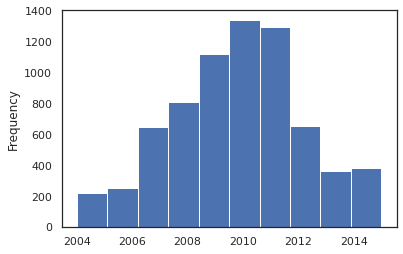

In [39]:
df.YEAR_SALE.plot(kind='hist');

In [40]:
#DIST MAINROAD
df.DIST_MAINROAD.value_counts()

39     56
51     53
78     52
77     49
73     48
       ..
33     24
136    24
167    24
12     23
25     20
Name: DIST_MAINROAD, Length: 201, dtype: int64

In [41]:
df.DIST_MAINROAD.describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

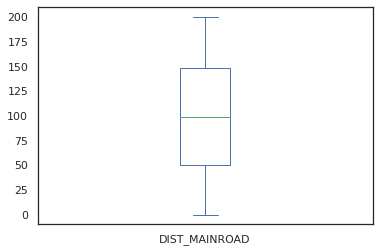

In [42]:
df.DIST_MAINROAD.plot(kind='box')

In [44]:
# N_BEDROOM
df.isnull().sum() 

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
YEAR_SALE         0
dtype: int64

In [45]:
df = df.fillna({'N_BEDROOM':df['N_BEDROOM'].median(),'N_BATHROOM':df['N_BATHROOM'].median(),'QS_OVERALL':df['QS_OVERALL'].mean()})

In [46]:
df.N_BEDROOM.value_counts() # majority single room are sold

1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

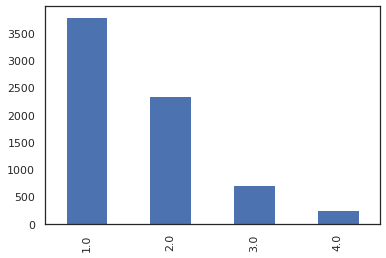

In [47]:
df.N_BEDROOM.value_counts().plot(kind = 'bar')

In [48]:
#N_BATHROOM
df.N_BATHROOM.value_counts()

1.0    5594
2.0    1515
Name: N_BATHROOM, dtype: int64

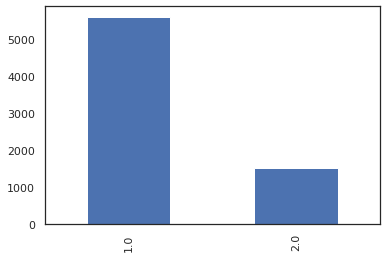

In [49]:
# as we see the 80% of houses sold having one bathroom
df.N_BATHROOM.value_counts().plot(kind='bar')

In [50]:
#N_ROOM
df.N_ROOM.value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

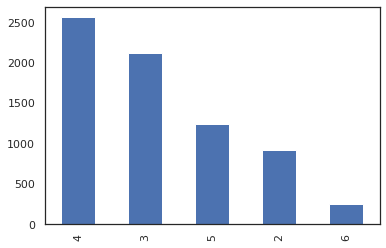

In [51]:
# we see the 1/3rd of houses sold having total number of rooms 4
df.N_ROOM.value_counts().plot(kind='bar')

In [52]:
#SALE COND
df.SALE_COND.value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [53]:
#correcting spelling mistakes
df.replace({'Adj Land':'AdjLand','Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial'},inplace=True)

In [54]:
df.SALE_COND.value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

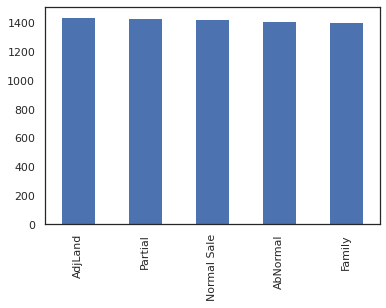

In [55]:
df.SALE_COND.value_counts().plot(kind='bar')

In [56]:
#PARK_FACIL
df.PARK_FACIL.value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [57]:
df.replace({'Noo':'No'},inplace=True)

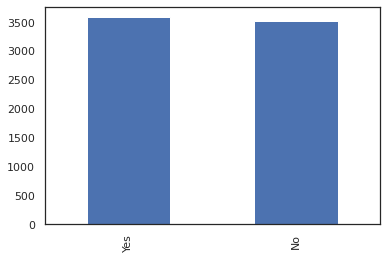

In [58]:
df.replace({'Noo':'No'},inplace=True)
# we see it is balanced 50:50
df.PARK_FACIL.value_counts().plot(kind='bar')

In [59]:
#YEAR_BUILD
#we have to create new feature in which year each houses build
df.DATE_BUILD.value_counts()

02-07-1987    6
04-04-1999    5
27-08-2000    4
13-05-1982    4
08-04-1989    4
             ..
24-07-1970    1
12-02-1998    1
04-11-1977    1
21-04-1986    1
24-07-1961    1
Name: DATE_BUILD, Length: 5808, dtype: int64

In [63]:
df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])

In [64]:
df['YEAR_BUILD'] = df['DATE_BUILD'].dt.year

In [65]:
df.drop(['DATE_BUILD'],axis=1)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YEAR_SALE,YEAR_BUILD
0,0,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,2011,1967
1,5,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,2006,1995
2,1,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,2012,1992
3,3,1855,2010-03-13,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,2010,1988
4,0,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,2009,1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,2011-03-01,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000,2011,1962
7105,3,1897,2004-08-04,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,10818480,2004,1995
7106,3,1614,2006-08-25,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8351410,2006,1978
7107,0,787,2009-03-08,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000,2009,1977


In [66]:
df.YEAR_BUILD.value_counts()

1985    200
1988    197
2002    194
1990    191
1999    189
       ... 
1954     11
2010      9
1951      6
1949      2
1950      2
Name: YEAR_BUILD, Length: 62, dtype: int64

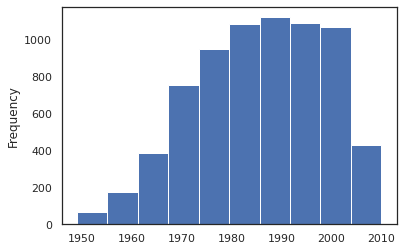

In [67]:
df.YEAR_BUILD.plot(kind='hist')

In [68]:
df.YEAR_BUILD.describe()

count    7109.000000
mean     1985.491912
std        12.648859
min      1949.000000
25%      1976.000000
50%      1986.000000
75%      1996.000000
max      2010.000000
Name: YEAR_BUILD, dtype: float64

In [69]:
#AGE
df['AGE']= df['YEAR_SALE']- df['YEAR_BUILD']

In [70]:
df.AGE.describe()

count    7109.000000
mean       24.276270
std        12.334164
min         3.000000
25%        14.000000
50%        23.000000
75%        34.000000
max        55.000000
Name: AGE, dtype: float64

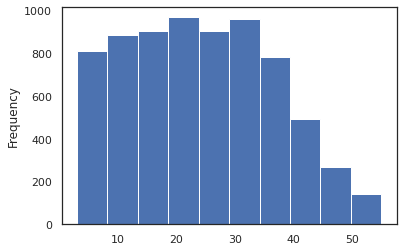

In [71]:
df.AGE.plot(kind='hist')

In [72]:
#BUILDTYPE
df.BUILDTYPE.value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [73]:
df.replace({'Other':'Others','Comercial':'Commercial'},inplace=True)

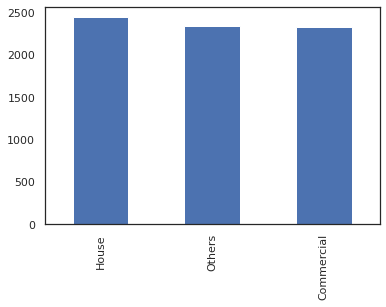

In [74]:
df.BUILDTYPE.value_counts().plot(kind='bar')

In [75]:
#UTILITY AVAIL
df.UTILITY_AVAIL.value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [76]:
df.replace({'All Pub':'AllPub'},inplace=True)

In [77]:
df.UTILITY_AVAIL.value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

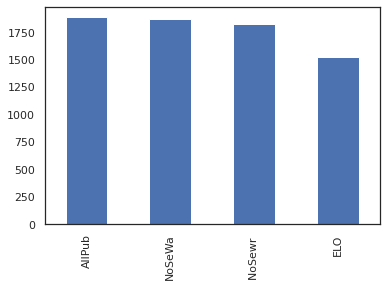

In [78]:
df.UTILITY_AVAIL.value_counts().plot(kind='bar')

In [79]:
#STREET
df.STREET.value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [80]:
df.replace({'Pavd':'Paved','NoAccess':'No Access'},inplace=True)

In [81]:
df.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

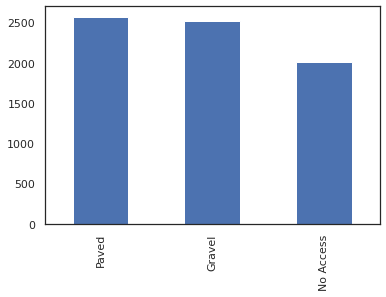

In [82]:
df.STREET.value_counts().plot(kind='bar')

In [83]:
#MZZONE
df.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

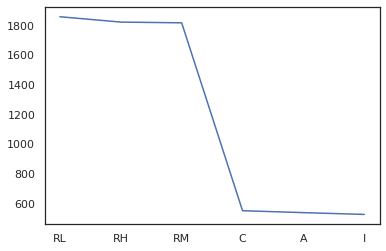

In [84]:

df.MZZONE.value_counts().plot(kind='line')

In [85]:
#QS ROOMS
df.QS_ROOMS.value_counts()

2.5    265
3.8    259
3.6    255
4.6    252
3.9    245
4.9    242
3.4    240
4.7    239
3.3    239
4.8    239
4.2    239
2.6    237
2.1    236
3.1    230
5.0    228
3.0    228
3.5    227
2.8    226
4.3    225
2.3    224
4.1    222
2.9    220
4.4    219
4.5    218
4.0    218
2.2    213
2.4    208
3.2    208
3.7    205
2.0    203
2.7    200
Name: QS_ROOMS, dtype: int64

In [86]:
df.QS_ROOMS.describe()

count    7109.000000
mean        3.517471
std         0.891972
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_ROOMS, dtype: float64

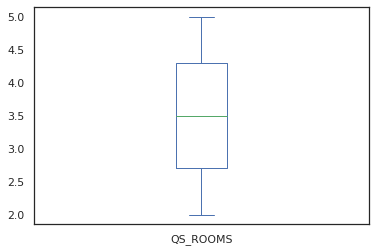

In [87]:
df.QS_ROOMS.plot(kind='box')

In [88]:
#QS BATHROOM
df.QS_BATHROOM.value_counts()

2.7    256
4.8    255
3.7    251
4.7    247
4.9    245
3.0    241
4.2    237
4.6    234
3.4    234
2.2    234
2.5    233
4.0    232
3.1    232
4.5    231
2.4    230
2.9    228
3.3    227
3.2    226
2.6    226
3.5    225
2.1    224
4.3    224
2.0    222
3.6    221
2.3    220
4.4    219
5.0    219
3.9    211
4.1    210
3.8    209
2.8    206
Name: QS_BATHROOM, dtype: int64

In [89]:
df.QS_BATHROOM.describe()

count    7109.000000
mean        3.507244
std         0.897834
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_BATHROOM, dtype: float64

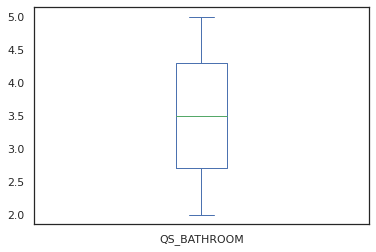

In [90]:
df.QS_BATHROOM.plot(kind='box')

In [91]:
#QS BEDROOM
df.QS_BEDROOM.value_counts()

2.6    273
3.2    253
4.0    248
2.4    244
3.8    244
3.1    243
2.1    242
3.0    241
3.4    239
4.3    237
4.4    237
3.5    237
2.2    237
3.3    234
4.6    233
4.7    228
4.5    227
2.5    226
3.6    225
4.1    223
2.7    222
2.0    221
3.9    220
2.9    219
5.0    217
4.2    212
4.8    211
2.8    210
3.7    203
4.9    203
2.3    200
Name: QS_BEDROOM, dtype: int64

In [92]:
df.QS_BEDROOM.describe()

count    7109.000000
mean        3.485300
std         0.887266
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_BEDROOM, dtype: float64

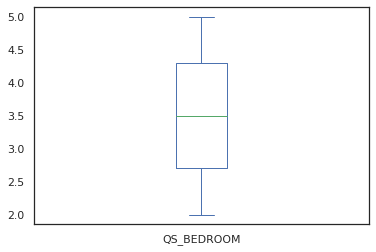

In [93]:
df.QS_BEDROOM.plot(kind='box')

In [94]:
#QS OVERALL
df.QS_OVERALL.value_counts()

3.540    59
3.260    57
3.320    56
3.560    55
3.360    54
         ..
2.545     1
2.110     1
3.965     1
4.345     1
4.940     1
Name: QS_OVERALL, Length: 480, dtype: int64

In [95]:
df.QS_OVERALL.describe()

count    7109.000000
mean        3.503254
std         0.525440
min         2.000000
25%         3.130000
50%         3.503254
75%         3.880000
max         4.970000
Name: QS_OVERALL, dtype: float64

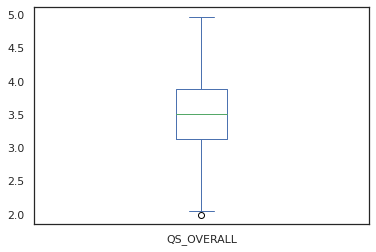

In [96]:
df.QS_OVERALL.plot(kind='box')

In [97]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YEAR_SALE,YEAR_BUILD,AGE
0,0,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,1967-05-15,...,Paved,A,4.0,3.9,4.9,4.330,7600000,2011,1967,44
1,5,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,1995-12-22,...,Gravel,RH,4.9,4.2,2.5,3.765,21717770,2006,1995,11
2,1,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,1992-09-02,...,Gravel,RL,4.1,3.8,2.2,3.090,13159200,2012,1992,20
3,3,1855,2010-03-13,14,3.0,2.0,5,Family,No,1988-03-18,...,Paved,I,4.7,3.9,3.6,4.010,9630290,2010,1988,22
4,0,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,1979-10-13,...,Gravel,C,3.0,2.5,4.1,3.290,7406250,2009,1979,30


In [98]:
#SALES PRICE
# this is our target variable
df.SALES_PRICE.value_counts()

5378000     2
9429000     2
4971250     2
4546625     2
11930880    2
           ..
6928000     1
14874950    1
9304770     1
6980320     1
9976480     1
Name: SALES_PRICE, Length: 7057, dtype: int64

In [99]:
df.SALES_PRICE.describe()

count    7.109000e+03
mean     1.089491e+07
std      3.768603e+06
min      2.156875e+06
25%      8.272100e+06
50%      1.033505e+07
75%      1.299390e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

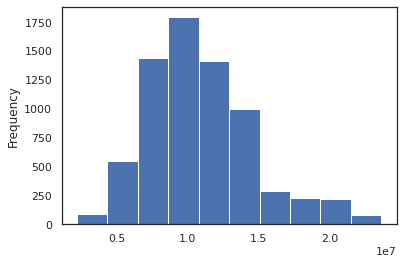

In [100]:
df.SALES_PRICE.plot(kind='hist')

In [101]:
df.corr()['SALES_PRICE'].sort_values(ascending=False)

SALES_PRICE      1.000000
AREA             0.694149
INT_SQFT         0.612125
N_ROOM           0.602760
N_BEDROOM        0.330987
YEAR_BUILD       0.116043
N_BATHROOM       0.108834
QS_ROOMS         0.021967
QS_OVERALL       0.020485
QS_BEDROOM       0.018804
DIST_MAINROAD    0.018783
YEAR_SALE        0.000906
QS_BATHROOM     -0.011377
AGE             -0.118842
Name: SALES_PRICE, dtype: float64

#DATA Visualation

In [102]:
#FEATURE VS TARGET
def bar(col):
  plt.figure(figsize=(8,5))
  sns.barplot(x=df[col],y=df.SALES_PRICE)

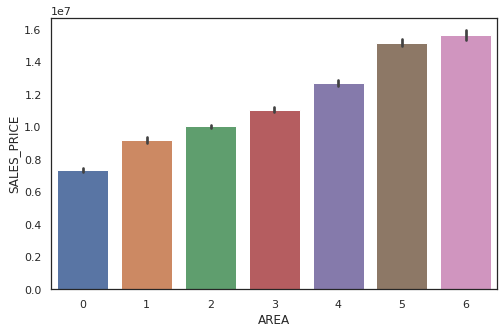

In [103]:
#AREA
bar('AREA')

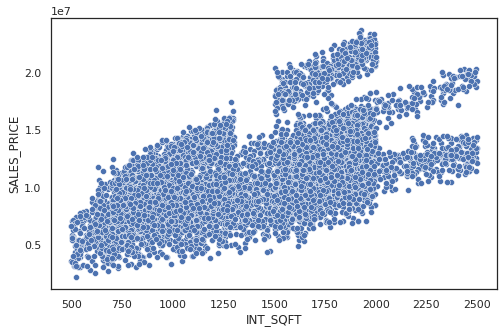

In [104]:
#INT_SQFT
#we see there is linear relation b/w sales price and int sqft
plt.figure(figsize=(8,5))
sns.scatterplot(x=df.INT_SQFT,y=df.SALES_PRICE)

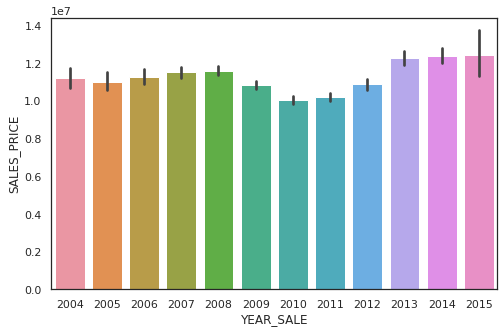

In [105]:
#YEAR_SALE
bar('YEAR_SALE')

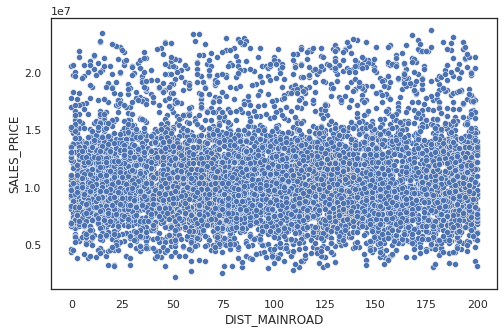

In [106]:
#DIST MAINROAD
# there is no pattern
plt.figure(figsize=(8,5))
sns.scatterplot(x=df.DIST_MAINROAD,y=df.SALES_PRICE)

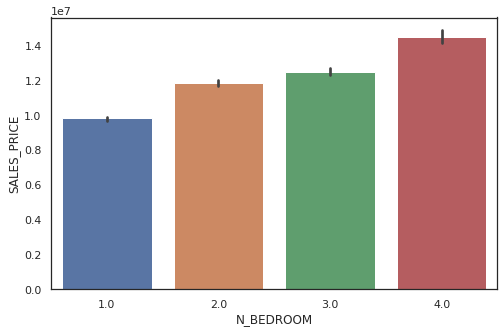

In [107]:
#N_BEDROOM
# there is linear relation b/w sales price and n bedrooms
bar('N_BEDROOM')

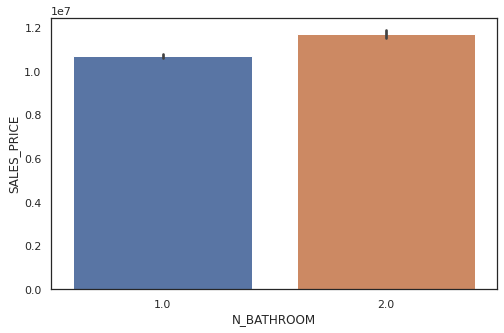

In [108]:
#N_BATHROOM
#there is linear relation b/w sales price and n bathroom
bar('N_BATHROOM')

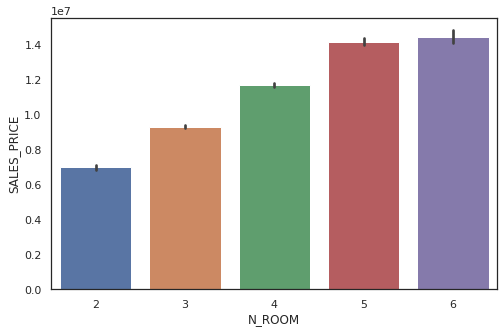

In [109]:
#N_ROOM
# there is linear relation b/w sales price and n rooms
bar('N_ROOM')

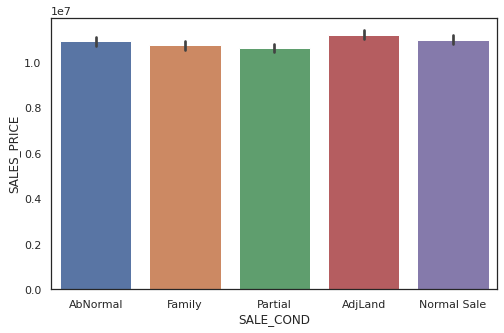

In [110]:
#SALE COUNT
# no patterns found
bar('SALE_COND')

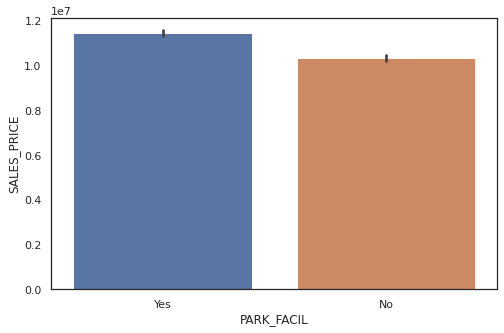

In [111]:
#PARK FACIL
#  there is linear relation b/w sales price and park facil
bar('PARK_FACIL')

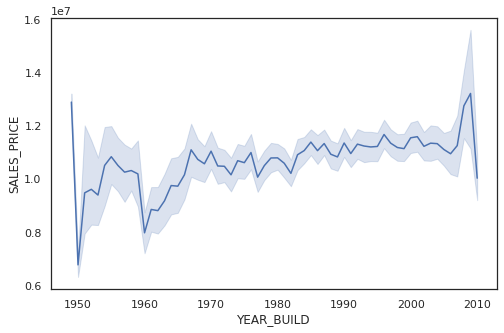

In [112]:
#YEAR BUILD
#there is some linear relation 
plt.figure(figsize=(8,5))
sns.lineplot(x=df.YEAR_BUILD,y=df.SALES_PRICE)

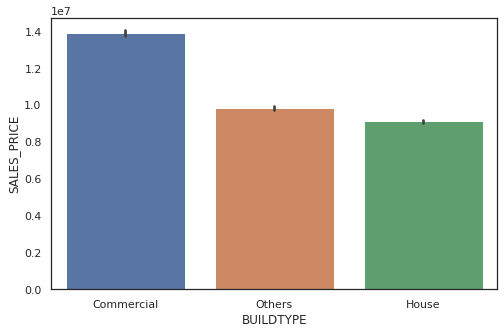

In [113]:
#BUILD TYPE
# we see there is linear relation b/w sales price and buildtype
bar('BUILDTYPE')

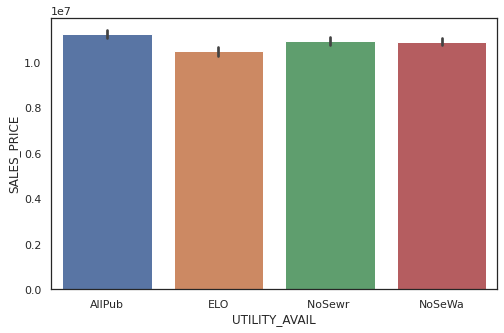

In [114]:
#UTILITY AVAIL
# there is some linear relation b/w sales price and utility avail
bar('UTILITY_AVAIL')

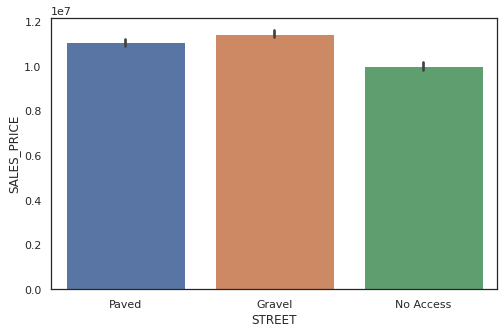

In [115]:
#STREET
# there is somelinear relation b/w sales price and street
bar('STREET')

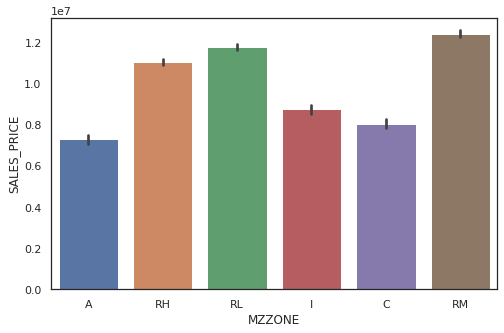

In [116]:
#MZZONE
# there is linear relation b/w sales price and mzzone
bar('MZZONE')

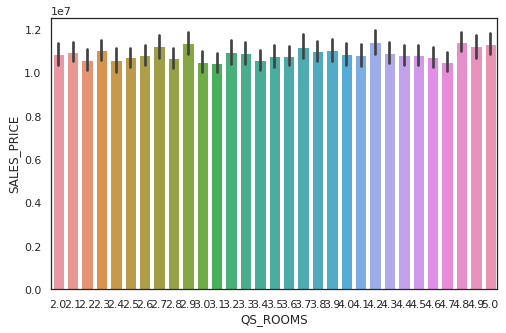

In [117]:
#QS ROOM
# no patterns found
bar('QS_ROOMS')

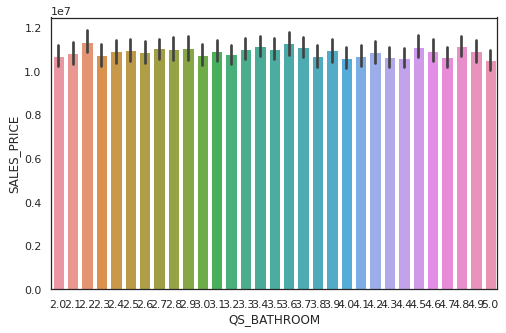

In [118]:
#QS_BATHROOM
# no patterns found
bar('QS_BATHROOM')

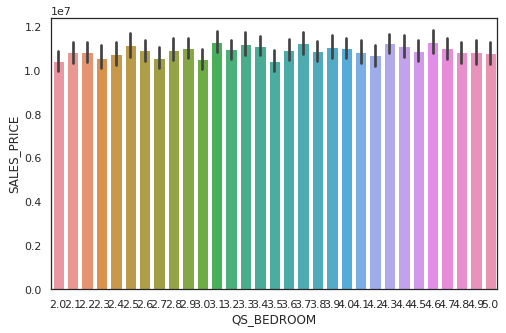

In [119]:
#QS BEADROOM
# no patterns found
bar('QS_BEDROOM')

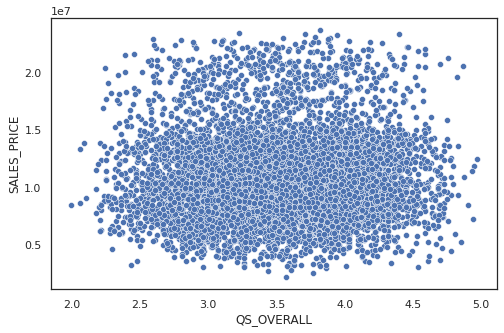

In [120]:
#QS OVERALL
#no patterns found
plt.figure(figsize=(8,5))
sns.scatterplot(x=df.QS_OVERALL,y=df.SALES_PRICE)

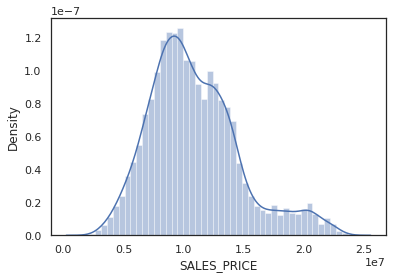

In [121]:
#SALE PRICE
sns.distplot(df['SALES_PRICE'])

In [ ]:
# NORMAL DISTRIBUTION WITH SLIGHTLY RIGHT SKEWED DATA

Modelling

In [122]:
df.drop(['YEAR_SALE','YEAR_BUILD','DATE_SALE','DATE_BUILD'],axis=1,inplace=True)

In [123]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,...,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr,STREET_No Access,STREET_Paved,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,0,1004,131,1.0,1.0,3,4.0,3.9,4.9,4.330,...,0,0,0,0,1,0,0,0,0,0
1,5,1986,26,2.0,1.0,5,4.9,4.2,2.5,3.765,...,0,0,0,0,0,0,0,1,0,0
2,1,909,70,1.0,1.0,3,4.1,3.8,2.2,3.090,...,1,0,0,0,0,0,0,0,1,0
3,3,1855,14,3.0,2.0,5,4.7,3.9,3.6,4.010,...,0,0,1,0,1,0,1,0,0,0
4,0,1226,84,1.0,1.0,3,3.0,2.5,4.1,3.290,...,0,0,0,0,0,1,0,0,0,0


In [124]:
X = df.drop('SALES_PRICE',axis=1)
y = df.SALES_PRICE

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [126]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lin = LinearRegression().fit(X_train,y_train)

In [127]:
lin.score(X_train,y_train)

0.9244974561253163

In [128]:
#Random Forest
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [129]:
rf = RandomForestRegressor(n_estimators=500).fit(X_train,y_train)
rf.score(X_train,y_train)

0.996942910152474

In [130]:
#XG boost
xg = XGBRegressor().fit(X_train,y_train)
xg.score(X_train,y_train)

[15:25:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9819513472735163

In [131]:
#Metrics
y_pred = lin.predict(X_test)
y_pred

array([14161763.18704976, 13710541.48273866, 18694715.87723909, ...,
       14166513.90707627,  8627022.31262983,  5480645.76765432])

In [132]:
from sklearn import metrics
print('R2 score:', metrics.r2_score(y_test,y_pred))

R2 score: 0.9244908960593095
